In [3]:
import torch

import simulator

checkpoint_path = 'checkpoints/divine-oath-219/best-val-acc-0.999-epoch-360.pt'
checkpoint = torch.load(checkpoint_path)
args = checkpoint['args']

sim = simulator.SubleqSimV3(mem_bits=args.N, num_mem=args.num_mem, ary=args.ary)

fail_state = torch.load('fail_state/' + checkpoint_path.split('/')[1] + '_fail-state.pt')

In [4]:
fail_info = []
for i, fail in enumerate(fail_state):
    if fail is not None:
        print('Trial', i)
        current_state, next_state_hyp, next_state = fail
        current_state_info = sim.readable_state(current_state)
        current_state = current_state_info['mem']
        next_state_hyp = sim.readable_state(next_state_hyp)['mem']
        next_state = sim.readable_state(next_state)['mem']

        print(current_state_info)
        fail_info.append(current_state_info)

        for j, seq in enumerate([current_state, next_state_hyp, next_state]):
            if j == 0:
                print('Input     :', end='')
            elif j == 1:
                print('Prediction:', end='')
            else:
                print('Target    :', end='')
            for pos in range(len(current_state)):
                if next_state_hyp[pos] != next_state[pos]:
                    # indicate error with a red background
                    print('\x1b[6;30;41m' + '{0: >6}'.format(seq[pos]) + '\x1b[0m', end='')
                else:
                    print('{0: >6}'.format(seq[pos]), end='')
            print()


Trial 1
{'pc': 2, 'eval': 'mem[37](412) <-- mem[37](412) - mem[310](412) = 0', 'jump': 'pc <-- 682', 'diff': 0, 'mem': [412, 437, 310, 37, 682, 279, 992, 412, 74, 858]}
Input     :   412   437   310    37   682   279   992   412    74   858
Prediction:   415   437   310    37   682   279   992     0    74   858
Target    :   682   437   310    37   682   279   992     0    74   858
Trial 5
{'pc': 7, 'eval': 'mem[324](696) <-- mem[324](696) - mem[13](694) = 2', 'jump': 'pc <-- pc + 3, c=627', 'diff': 2, 'mem': [627, 34, 387, 694, 696, 601, 610, 13, 324, 627]}
Input     :   627    34   387   694   696   601   610    13   324   627
Prediction:   627    34   387   694     2   601   610    13   324   627
Target    :   630    34   387   694     2   601   610    13   324   627
Trial 10
{'pc': 7, 'eval': 'mem[325](0) <-- mem[325](0) - mem[641](0) = 0', 'jump': 'pc <-- 301', 'diff': 0, 'mem': [57, 0, 149, 721, 775, 0, 48, 641, 325, 301]}
Input     :    57     0   149   721   775     0    48   6

In [5]:
# test_state = fail_state[8][0]

# sim.set_state(test_state)
# print(sim.step(verbose=True))

<BarContainer object of 26 artists>

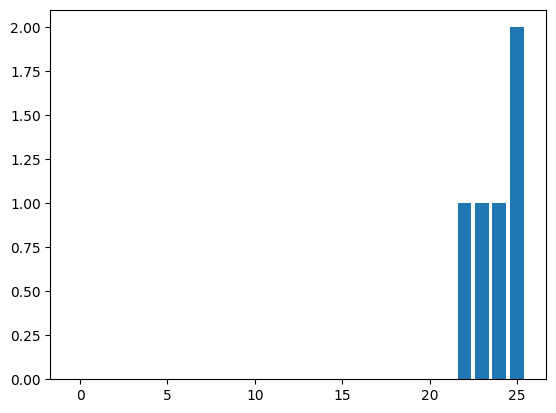

In [6]:
import matplotlib.pyplot as plt

plt.bar(range(len(fail_info)), sorted([f['diff'] for f in fail_info]))